# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 12.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
301587,0.1270,0.0024,0.0342,0.0024,0.0024,0.0024,0.1343,0.1099,0.0024,0.0415,3,3,7,7
246404,0.1685,0.0024,0.0024,0.0024,0.0024,0.0024,0.0049,0.0439,0.0024,0.0488,0,0,0,0
362627,0.0317,0.0024,0.1123,0.2002,0.0024,0.0024,0.0659,0.9302,0.2002,0.3027,3,3,14,14
181537,0.0562,0.0562,0.0024,0.0024,0.0049,0.0024,0.0024,0.1050,0.0024,0.1660,0,0,0,0
391408,0.0073,0.0024,0.0024,0.0024,0.0024,0.0024,0.0586,0.0122,0.0024,0.0024,5,5,17,17


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460382 entries, 0 to 460381
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          460382 non-null  float64
 1   Emg2          460382 non-null  float64
 2   Emg3          460382 non-null  float64
 3   Emg4          460382 non-null  float64
 4   Emg5          460382 non-null  float64
 5   Emg6          460382 non-null  float64
 6   Emg7          460382 non-null  float64
 7   Emg8          460382 non-null  float64
 8   Emg9          460382 non-null  float64
 9   Emg10         460382 non-null  float64
 10  repetition    460382 non-null  int64  
 11  rerepetition  460382 non-null  int64  
 12  stimulus      460382 non-null  int64  
 13  restimulus    460382 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.2 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000,460382.000000
mean,0.228323,0.149005,0.158937,0.051782,0.009471,0.009314,0.118619,0.383167,0.090241,0.158943,3.201413,2.333123,5.674920,4.168397
std,0.386383,0.289871,0.354328,0.167727,0.031863,0.031848,0.278554,0.484126,0.287058,0.150671,3.487234,3.297521,6.590112,6.223571
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.000000,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041500,0.002400,0.002400,0.002400,0.002400,0.002400,0.007300,0.102500,0.002400,0.031700,0.000000,0.000000,0.000000,0.000000
50%,0.087900,0.034200,0.002400,0.002400,0.002400,0.002400,0.048800,0.214800,0.002400,0.141600,2.000000,0.000000,3.000000,0.000000
75%,0.214800,0.161100,0.153800,0.007300,0.002400,0.002400,0.127000,0.505400,0.034200,0.239300,6.000000,5.000000,10.000000,8.000000
max,4.668000,4.668000,4.663100,4.665500,1.171900,0.778800,4.665500,4.668000,4.663100,2.878400,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     192400
4      15502
7      15495
12     15491
8      15487
2      15486
11     15469
9      15465
6      15448
5      15447
3      15425
1      15417
10     15406
14     10334
13     10332
17     10332
15     10293
16     10255
19      5172
18      5169
21      5169
23      5133
20      5130
22      5125
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.513310,-0.529788,-0.483625,-0.323648,-0.244533,-0.236894,-0.313694,-0.683791,-0.3356,0.270732
1,-0.519087,-0.529788,-0.483625,-0.323648,-0.244533,-0.236894,-0.313694,-0.683791,-0.3356,0.255515
2,-0.536898,-0.529788,-0.483625,-0.323648,-0.244533,-0.236894,-0.193134,-0.688596,-0.3356,0.224448
3,-0.560245,-0.529788,-0.477087,-0.323648,-0.244533,-0.236894,-0.112431,-0.697821,-0.3356,0.224448
4,-0.566263,-0.529788,-0.483625,-0.323648,-0.244533,-0.236894,-0.104525,-0.683791,-0.3356,0.270732
...,...,...,...,...,...,...,...,...,...,...
380064,-0.419199,-0.529788,-0.483625,-0.323648,-0.244533,-0.236894,-0.401973,-0.650927,-0.3356,-0.890178
380065,-0.419199,-0.529788,-0.483625,-0.323648,-0.244533,-0.236894,-0.394067,-0.636897,-0.3356,-0.890178
380066,-0.430993,-0.529788,-0.483625,-0.323648,-0.244533,-0.236894,-0.410208,-0.641702,-0.3356,-0.905395
380067,-0.425216,-0.529788,-0.483625,-0.323648,-0.244533,-0.236894,-0.401973,-0.655732,-0.3356,-0.936463


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
75/75 [==============================] - 3s 28ms/step - loss: 1.4564 - accuracy: 0.6178 - val_loss: 1.0741 - val_accuracy: 0.7052
Epoch 2/100
75/75 [==============================] - 2s 26ms/step - loss: 0.9946 - accuracy: 0.7213 - val_loss: 0.9003 - val_accuracy: 0.7462
Epoch 3/100
75/75 [==============================] - 2s 26ms/step - loss: 0.8561 - accuracy: 0.7545 - val_loss: 0.7781 - val_accuracy: 0.7753
Epoch 4/100
75/75 [==============================] - 2s 26ms/step - loss: 0.7731 - accuracy: 0.7752 - val_loss: 0.7185 - val_accuracy: 0.7903
Epoch 5/100
75/75 [==============================] - 2s 25ms/step - loss: 0.7197 - accuracy: 0.7877 - val_loss: 0.6763 - val_accuracy: 0.8001
Epoch 6/100
75/75 [==============================] - 2s 26ms/step - loss: 0.6776 - accuracy: 0.7980 - val_loss: 0.6384 - val_accuracy: 0.8100
Epoch 7/100
75/75 [==============================] - 2s 27ms/step - loss: 0.6447 - accuracy: 0.8063 - val_loss: 0.6107 - val_accuracy: 0.8176
Epoch 

75/75 [==============================] - 2s 27ms/step - loss: 0.2641 - accuracy: 0.9135 - val_loss: 0.3118 - val_accuracy: 0.9015
Epoch 59/100
75/75 [==============================] - 2s 26ms/step - loss: 0.2637 - accuracy: 0.9131 - val_loss: 0.3164 - val_accuracy: 0.9014
Epoch 60/100
75/75 [==============================] - 2s 27ms/step - loss: 0.2608 - accuracy: 0.9146 - val_loss: 0.3124 - val_accuracy: 0.9017
Epoch 61/100
75/75 [==============================] - 2s 27ms/step - loss: 0.2619 - accuracy: 0.9138 - val_loss: 0.3144 - val_accuracy: 0.9014
Epoch 62/100
75/75 [==============================] - 2s 26ms/step - loss: 0.2565 - accuracy: 0.9158 - val_loss: 0.3172 - val_accuracy: 0.9006
Epoch 63/100
75/75 [==============================] - 2s 27ms/step - loss: 0.2556 - accuracy: 0.9159 - val_loss: 0.3023 - val_accuracy: 0.9043
Epoch 64/100
75/75 [==============================] - 2s 26ms/step - loss: 0.2521 - accuracy: 0.9172 - val_loss: 0.3049 - val_accuracy: 0.9051
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

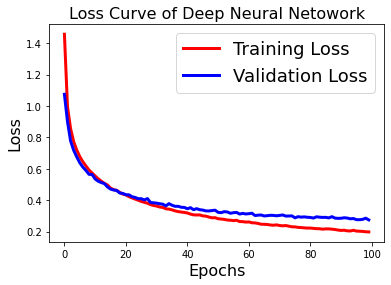

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

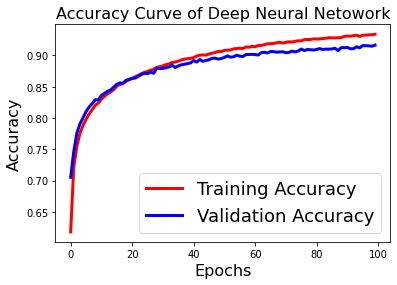

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([ 0,  0,  3, ...,  2, 22,  0], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

0

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 91.64364459178572


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     37518
           1       0.92      0.91      0.91      2216
           2       0.90      0.85      0.87      2231
           3       0.93      0.85      0.89      2098
           4       0.87      0.89      0.88      2142
           5       0.92      0.85      0.88      2303
           6       0.94      0.90      0.92      2161
           7       0.84      0.78      0.81      2362
           8       0.91      0.91      0.91      2236
           9       0.88      0.90      0.89      2288
          10       0.93      0.83      0.88      2451
          11       0.92      0.94      0.93      2048
          12       0.87      0.79      0.83      2126
          13       0.94      0.86      0.90      1397
          14       0.84      0.78      0.81      1285
          15       0.77      0.81      0.79      1381
          16       0.94      0.87      0.90      1373
 

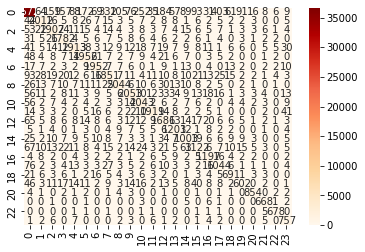

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6938984923829821
MSE: 8.280395716578525
RMSE: 2.8775676736748563


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.915954463365482
Recall Score :  0.9164364459178572
f1_score :  0.9152623626019017
